FIFA를 하는 사람이라면 유망주를 꼭 키워봤을 것이다.  
그러나 누가 유망주고, 어디까지 성장할 수 있는지 파악하기는 힘들다.  
따라서, 어떤 유망주를 키워야 하는지, 성장에 미치는 요소는 무엇인지 데이터를 분석해서 알아보겠다.

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
# df프레임 확인
df = pd.read_csv("fifa19.csv")
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [ ]:
# 데이터 전처리하자
# 우선 X값 y값 target하고
# X 값 속성을 정의하자

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
# 필요한 만큼 데이터를 사용하자
# 우선 필요 없는 X 값을 슬라이싱으로 처리
# 그리고 중간중간의 X 값을 pop으로 제거한다.
df = df.iloc[:, :28]
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,"Jul 1, 2017",NaN,2021,5'8,148lbs
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,"Apr 24, 2018",NaN,2019,5'10,154lbs


In [ ]:
df.pop('Unnamed: 0')
df.pop('Name')
df.pop('Photo')
df.pop('Flag')
df.pop('Club')
df.pop('Nationality')
df.pop('Club Logo')
df.pop('Work Rate')
df.pop('Body Type')
df.pop('Real Face')
df.pop('Position')
df.pop('Joined')
df.pop('Loaned From')
df.pop('Contract Valid Until')
df

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,€110.5M,€565K,2202,Left,5.0,4.0,4.0,10.0,5'7,159lbs
1,20801,33,94,94,€77M,€405K,2228,Right,5.0,4.0,5.0,7.0,6'2,183lbs
2,190871,26,92,93,€118.5M,€290K,2143,Right,5.0,5.0,5.0,10.0,5'9,150lbs
3,193080,27,91,93,€72M,€260K,1471,Right,4.0,3.0,1.0,1.0,6'4,168lbs
4,192985,27,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,7.0,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,€60K,€1K,1307,Right,1.0,2.0,2.0,22.0,5'9,134lbs
18203,243165,19,47,63,€60K,€1K,1098,Right,1.0,2.0,2.0,21.0,6'3,170lbs
18204,241638,16,47,67,€60K,€1K,1189,Right,1.0,3.0,2.0,33.0,5'8,148lbs
18205,246268,17,47,66,€60K,€1K,1228,Right,1.0,3.0,2.0,34.0,5'10,154lbs


In [ ]:
# 깔끔하게 정리되었다.
# 이제 null값 제거 및 object를 float or int 값으로 변경하자.

In [ ]:
df_ = df.copy()
df_

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,€110.5M,€565K,2202,Left,5.0,4.0,4.0,10.0,5'7,159lbs
1,20801,33,94,94,€77M,€405K,2228,Right,5.0,4.0,5.0,7.0,6'2,183lbs
2,190871,26,92,93,€118.5M,€290K,2143,Right,5.0,5.0,5.0,10.0,5'9,150lbs
3,193080,27,91,93,€72M,€260K,1471,Right,4.0,3.0,1.0,1.0,6'4,168lbs
4,192985,27,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,7.0,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,€60K,€1K,1307,Right,1.0,2.0,2.0,22.0,5'9,134lbs
18203,243165,19,47,63,€60K,€1K,1098,Right,1.0,2.0,2.0,21.0,6'3,170lbs
18204,241638,16,47,67,€60K,€1K,1189,Right,1.0,3.0,2.0,33.0,5'8,148lbs
18205,246268,17,47,66,€60K,€1K,1228,Right,1.0,3.0,2.0,34.0,5'10,154lbs


In [ ]:
# dropna로 지우자
# 물론 데이터를 복사해서 사용하자
df.dropna(axis=0).info()
df.dropna(axis=1).info()
df.dropna(inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18147 non-null  int64  
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  object 
 5   Wage                      18147 non-null  object 
 6   Special                   18147 non-null  int64  
 7   Preferred Foot            18147 non-null  object 
 8   International Reputation  18147 non-null  float64
 9   Weak Foot                 18147 non-null  float64
 10  Skill Moves               18147 non-null  float64
 11  Jersey Number             18147 non-null  float64
 12  Height                    18147 non-null  object 
 13  Weight                    18147 non-null  object 
dtypes: flo

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,€110.5M,€565K,2202,Left,5.0,4.0,4.0,10.0,5'7,159lbs
1,20801,33,94,94,€77M,€405K,2228,Right,5.0,4.0,5.0,7.0,6'2,183lbs
2,190871,26,92,93,€118.5M,€290K,2143,Right,5.0,5.0,5.0,10.0,5'9,150lbs
3,193080,27,91,93,€72M,€260K,1471,Right,4.0,3.0,1.0,1.0,6'4,168lbs
4,192985,27,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,7.0,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,€60K,€1K,1307,Right,1.0,2.0,2.0,22.0,5'9,134lbs
18203,243165,19,47,63,€60K,€1K,1098,Right,1.0,2.0,2.0,21.0,6'3,170lbs
18204,241638,16,47,67,€60K,€1K,1189,Right,1.0,3.0,2.0,33.0,5'8,148lbs
18205,246268,17,47,66,€60K,€1K,1228,Right,1.0,3.0,2.0,34.0,5'10,154lbs


In [ ]:
# Vlaue와 Wage에 포함되어있는 특수문자와 단위를 통일시키기 위하여 함수를 사용하겠다.
# M=000, k=''
# 텍스트에 포함되어 있는 특수 문자 제거
def cleanText(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ€!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData) # Value, Wage

    if text[-1] == 'M': # Value
      text = text.replace('M', '000')
    elif text[-1] == 'K': # Value
      text = text.replace('K', '')
    elif text[-3:] == 'lbs': # Weight
      text = text.replace('lbs', '')
    # elif text[-2:] == "'":
    #   text = text.replace("'", ".")
    return text

In [ ]:
# Height type 변형하려고 만든 함수
def replaceText(readData):
    text = re.sub("[']", '.', readData) # Height

    if text[:] == "'":
      text = text.replace("'", ".")
    return text

In [ ]:
# 특수문자 제거하고, 깔끔하게 float형태로 만들자
# 또 Height의 ' 항목을 .로 바꾸자
df['Value'] = (df['Value'].apply(cleanText).astype(float))
df['Wage'] = (df['Wage'].apply(cleanText).astype(float))
df['Height'] = (df['Height'].apply(replaceText).astype(float))
df['Weight'] = (df['Weight'].apply(cleanText).astype(float))
df

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,1105000.0,565.0,2202,Left,5.0,4.0,4.0,10.0,5.70,159.0
1,20801,33,94,94,77000.0,405.0,2228,Right,5.0,4.0,5.0,7.0,6.20,183.0
2,190871,26,92,93,1185000.0,290.0,2143,Right,5.0,5.0,5.0,10.0,5.90,150.0
3,193080,27,91,93,72000.0,260.0,1471,Right,4.0,3.0,1.0,1.0,6.40,168.0
4,192985,27,91,92,102000.0,355.0,2281,Right,4.0,5.0,4.0,7.0,5.11,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60.0,1.0,1307,Right,1.0,2.0,2.0,22.0,5.90,134.0
18203,243165,19,47,63,60.0,1.0,1098,Right,1.0,2.0,2.0,21.0,6.30,170.0
18204,241638,16,47,67,60.0,1.0,1189,Right,1.0,3.0,2.0,33.0,5.80,148.0
18205,246268,17,47,66,60.0,1.0,1228,Right,1.0,3.0,2.0,34.0,5.10,154.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18147 non-null  int64  
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  float64
 5   Wage                      18147 non-null  float64
 6   Special                   18147 non-null  int64  
 7   Preferred Foot            18147 non-null  object 
 8   International Reputation  18147 non-null  float64
 9   Weak Foot                 18147 non-null  float64
 10  Skill Moves               18147 non-null  float64
 11  Jersey Number             18147 non-null  float64
 12  Height                    18147 non-null  float64
 13  Weight                    18147 non-null  float64
dtypes: flo

In [ ]:
# Preferred Foot을 왼발이면 0, 오른발이면 1로 지정하겠다.
df['Preferred Foot'] = np.where(df['Preferred Foot']=='Left', int(1), int(0))
df.astype(float)
df

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,1105000.0,565.0,2202,1,5.0,4.0,4.0,10.0,5.70,159.0
1,20801,33,94,94,77000.0,405.0,2228,0,5.0,4.0,5.0,7.0,6.20,183.0
2,190871,26,92,93,1185000.0,290.0,2143,0,5.0,5.0,5.0,10.0,5.90,150.0
3,193080,27,91,93,72000.0,260.0,1471,0,4.0,3.0,1.0,1.0,6.40,168.0
4,192985,27,91,92,102000.0,355.0,2281,0,4.0,5.0,4.0,7.0,5.11,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60.0,1.0,1307,0,1.0,2.0,2.0,22.0,5.90,134.0
18203,243165,19,47,63,60.0,1.0,1098,0,1.0,2.0,2.0,21.0,6.30,170.0
18204,241638,16,47,67,60.0,1.0,1189,0,1.0,3.0,2.0,33.0,5.80,148.0
18205,246268,17,47,66,60.0,1.0,1228,0,1.0,3.0,2.0,34.0,5.10,154.0


In [ ]:
# astype을 float로 바꾸었으니 가공된 데이터 준비 완료하였다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18147 non-null  int64  
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  float64
 5   Wage                      18147 non-null  float64
 6   Special                   18147 non-null  int64  
 7   Preferred Foot            18147 non-null  int64  
 8   International Reputation  18147 non-null  float64
 9   Weak Foot                 18147 non-null  float64
 10  Skill Moves               18147 non-null  float64
 11  Jersey Number             18147 non-null  float64
 12  Height                    18147 non-null  float64
 13  Weight                    18147 non-null  float64
dtypes: flo

In [ ]:
# 이제 본격적으로 sklearn을 통해서 correlation을 알아보겠다.

In [ ]:
# 필요 모듈 불러오기
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# train, test 분리
X = df[['ID', 'Age', 'Overall', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation',
        'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight']]
y = df[['Potential']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

y_train

,Potential
12144,64
11173,64
11415,74
1693,75
556,85
...,...
10256,76
7551,72
5752,69
9621,66


In [ ]:
# 여기까지 잘 했지만, 우발상황을 대비해 데이터프레임(데이터셋)을 하나 복사해놓자.
df_ = df.copy()
df_

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,158023,31,94,94,1105000.0,565.0,2202,1,5.0,4.0,4.0,10.0,5.70,159.0
1,20801,33,94,94,77000.0,405.0,2228,0,5.0,4.0,5.0,7.0,6.20,183.0
2,190871,26,92,93,1185000.0,290.0,2143,0,5.0,5.0,5.0,10.0,5.90,150.0
3,193080,27,91,93,72000.0,260.0,1471,0,4.0,3.0,1.0,1.0,6.40,168.0
4,192985,27,91,92,102000.0,355.0,2281,0,4.0,5.0,4.0,7.0,5.11,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60.0,1.0,1307,0,1.0,2.0,2.0,22.0,5.90,134.0
18203,243165,19,47,63,60.0,1.0,1098,0,1.0,2.0,2.0,21.0,6.30,170.0
18204,241638,16,47,67,60.0,1.0,1189,0,1.0,3.0,2.0,33.0,5.80,148.0
18205,246268,17,47,66,60.0,1.0,1228,0,1.0,3.0,2.0,34.0,5.10,154.0


In [ ]:
# fit로 훈련 지정해주고
lrg = LinearRegression()
lrg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# train score는 얼마나 나오지?
lrg.score(X_train, y_train)

0.8360104208517041

In [ ]:
# test score는 얼마나 나오지?
lrg.score(X_test, y_test)

0.8356103909099362

In [ ]:
# Linear Model training strat
# 모델링을 어떻게 시켜 줄 것인가?

In [ ]:
X = np.linspace(1, 10, 20) # 가장 적절한 linspace는?
y = 3*X + np.random.normal(size=(X.shape[0]))
X = X.reshape(-1, 1)

lrg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lrg.predict(X)

array([ 3.18161636,  4.55703136,  5.93244636,  7.30786136,  8.68327637,
       10.05869137, 11.43410637, 12.80952137, 14.18493637, 15.56035138,
       16.93576638, 18.31118138, 19.68659638, 21.06201139, 22.43742639,
       23.81284139, 25.18825639, 26.5636714 , 27.9390864 , 29.3145014 ])

In [ ]:
# 상관관계와 변수 관계를 빠르게 파악하기 위해 describe()를 열어준다.
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,18147.000000,18147.000000,18147.000000,18147.000000,1.814700e+04,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,214279.818868,25.121122,66.253926,71.324076,1.367395e+04,9.759024,1598.002645,0.231939,1.113297,2.947154,2.361492,19.546096,5.797413,165.982972
std,29970.319078,4.669796,6.913320,6.132286,3.993434e+04,22.030250,272.882706,0.422082,0.394150,0.660498,0.756274,15.947765,0.448266,15.593388
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.100000,110.000000
25%,200305.500000,21.000000,62.000000,67.000000,3.000000e+02,1.000000,1457.000000,0.000000,1.000000,3.000000,2.000000,8.000000,5.110000,154.000000
50%,221740.000000,25.000000,66.000000,71.000000,6.750000e+02,3.000000,1635.000000,0.000000,1.000000,3.000000,2.000000,17.000000,5.900000,165.000000
75%,236512.500000,28.000000,71.000000,75.000000,1.300000e+04,9.000000,1787.000000,0.000000,1.000000,3.000000,3.000000,26.000000,6.100000,176.000000
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+06,565.000000,2346.000000,1.000000,5.000000,5.000000,5.000000,99.000000,6.900000,243.000000


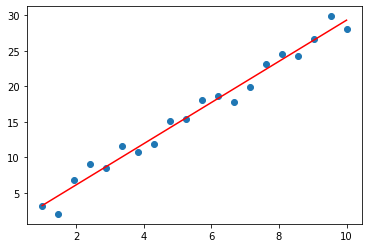

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, lrg.predict(X), 'r-')

In [ ]:
lrg.coef_, lrg.intercept_

(array([2.90365389]), 0.27796246145767967)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


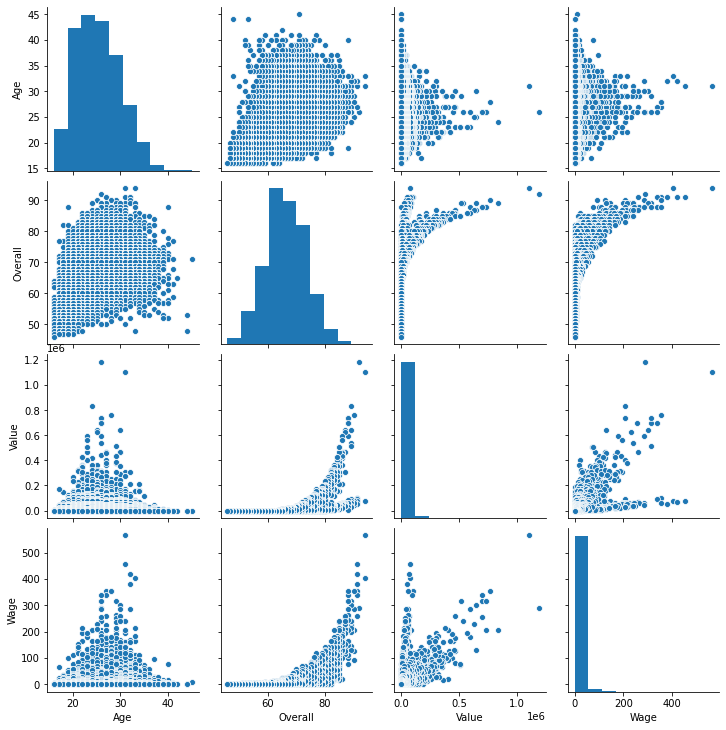

In [ ]:
# 시각화해보기
import seaborn as sns
import matplotlib
cols = ["Age", "Overall", "Value", "Wage"]
sns.pairplot(df[cols])
plt.show()